In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from  sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error,r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
# to remove the warning from notebook plz type this command okey 
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df=pd.read_csv("diabetes.csv")
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
#some simple question about the project see it is supervised or unsupervised ml -> ANS: supervised ml because it contain input and out feature
# know the second question is it is regression or classification problem the answer is classification it output contain (0,1) mean yes or no 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# independent featre -> 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
# dependent feature -> outcomes
# description about statistics point of view
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
df.shape

(768, 9)

In [8]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

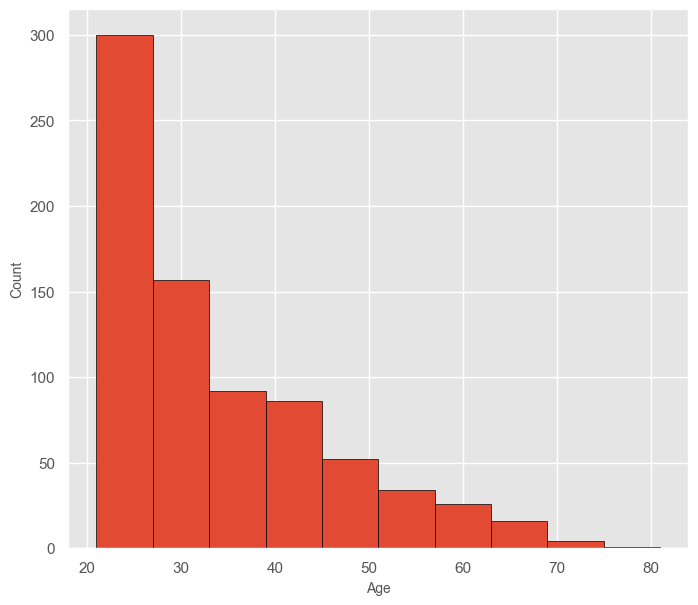

In [9]:
# Plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age',fontsize=10)
plt.ylabel('Count',fontsize=10)
df['Age'].hist(edgecolor='black')

In [10]:
# check minimun and maximum value of the age feature
df['Age'].max()

np.int64(81)

In [11]:
df['Age'].min()

np.int64(21)

In [12]:
print("Max Age:"+str(df['Age'].max()))
print("Min Age:"+str(df['Age'].min()))

Max Age:81
Min Age:21


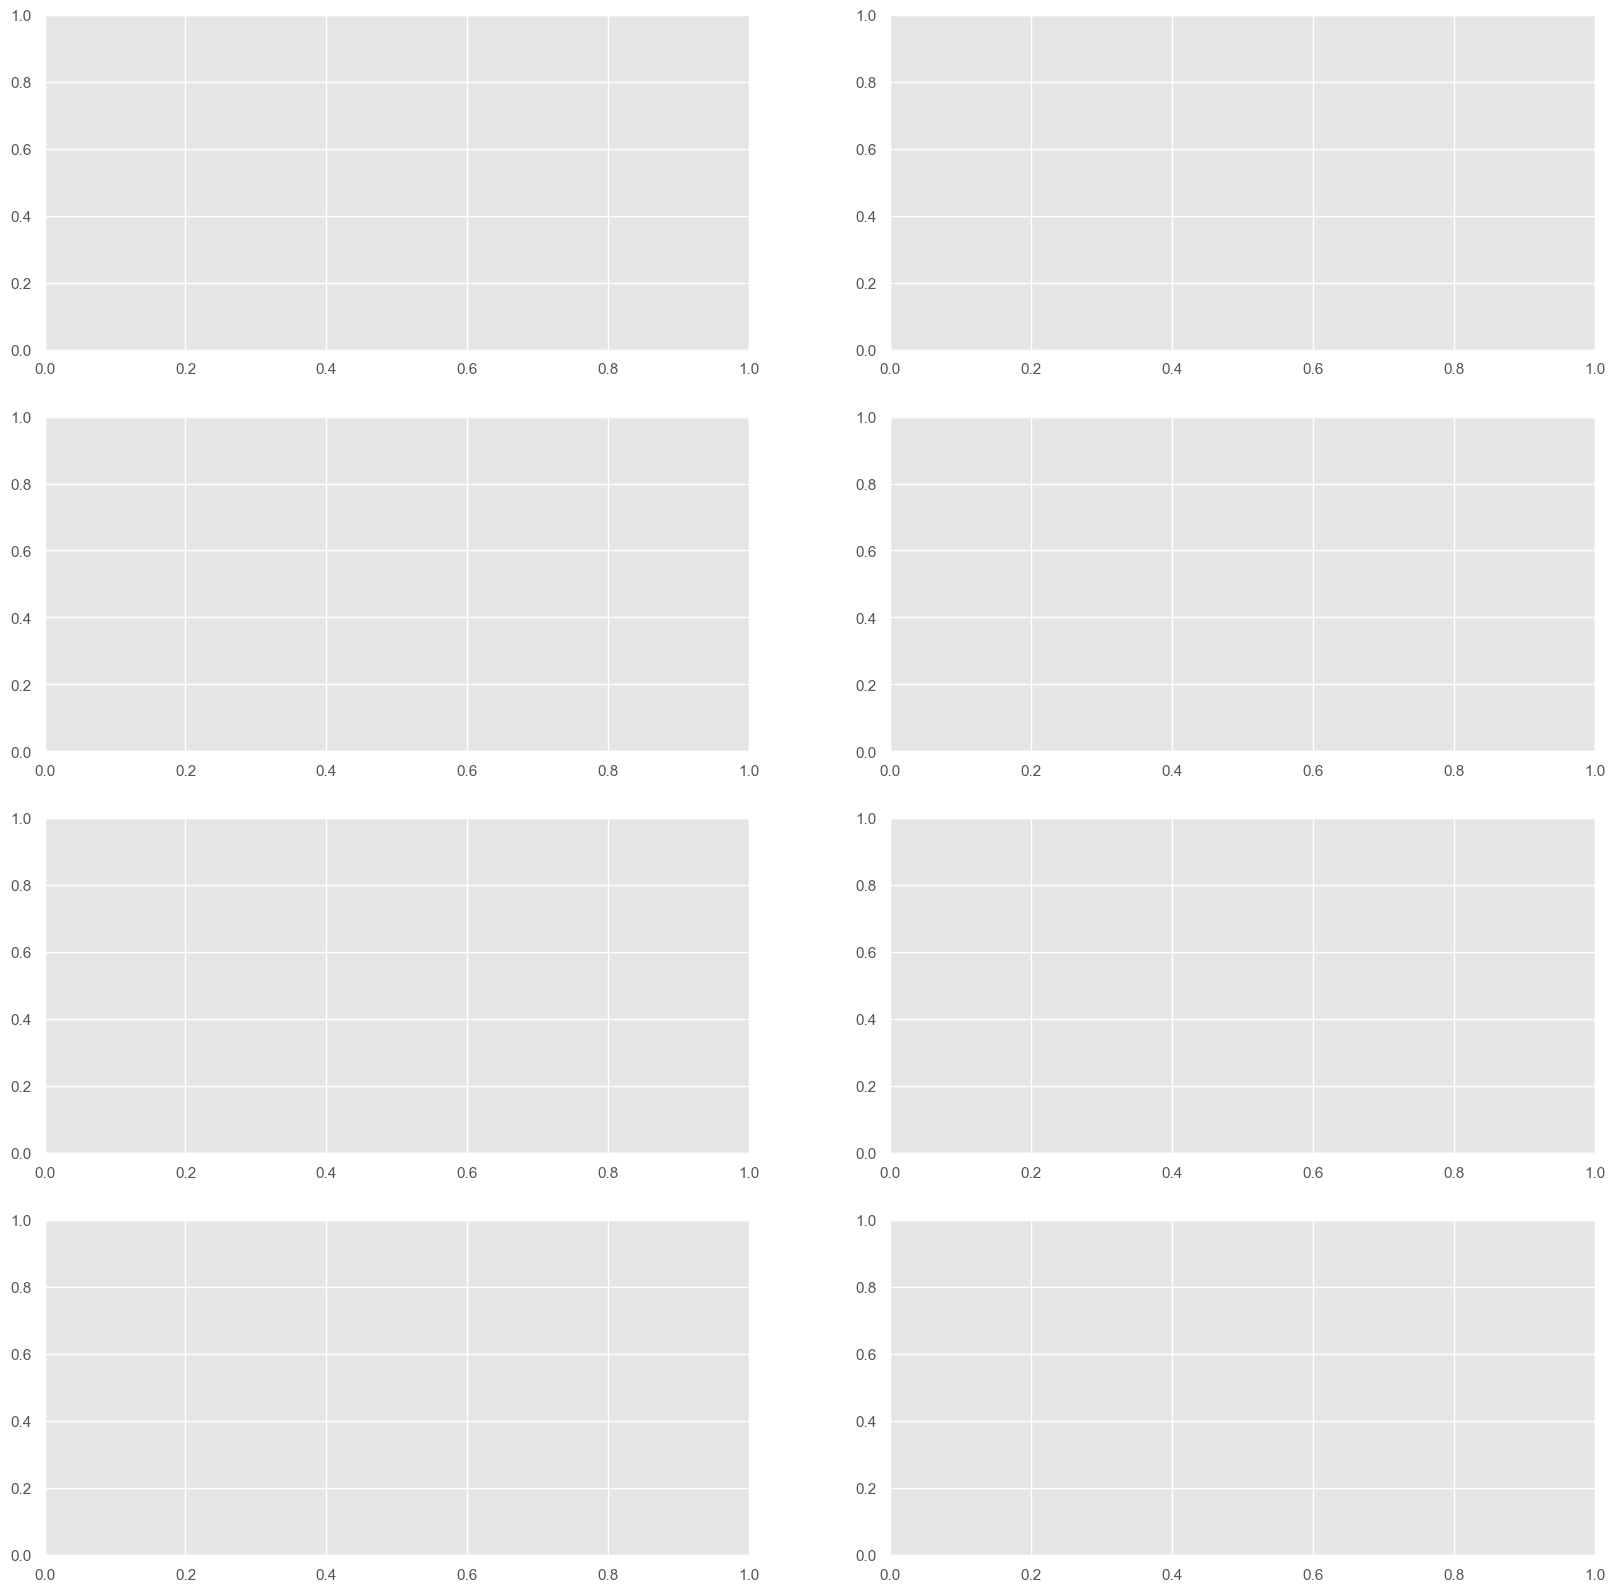

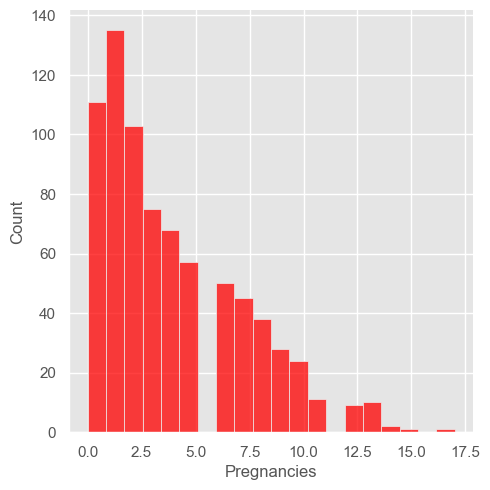

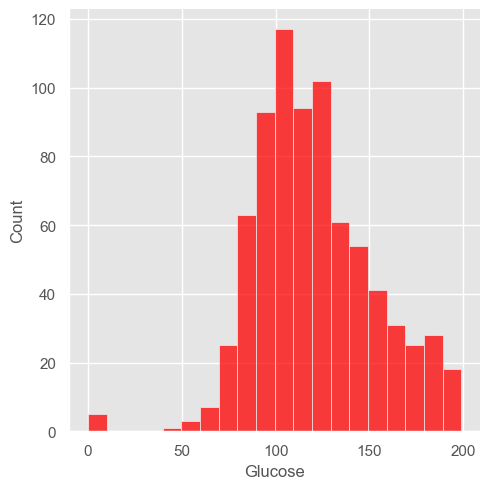

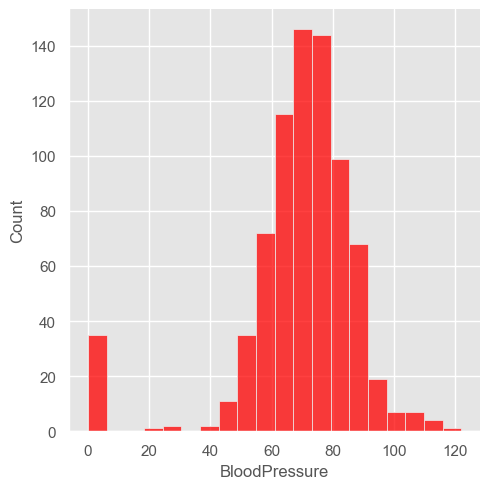

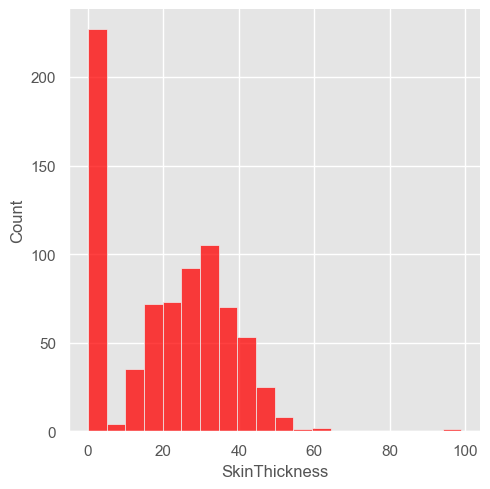

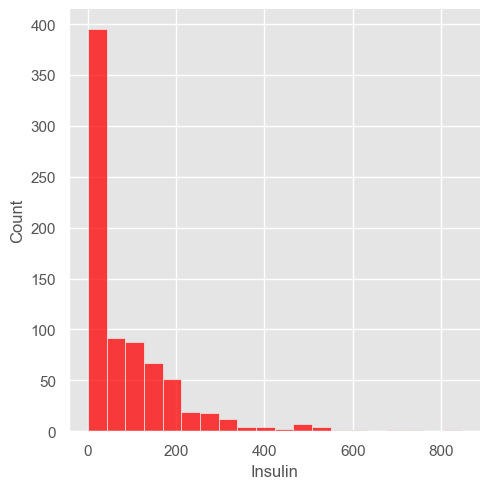

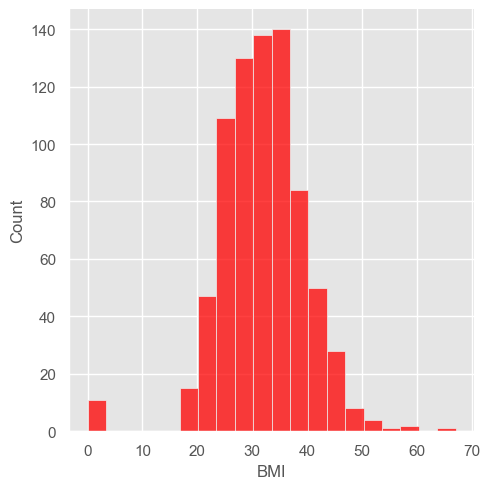

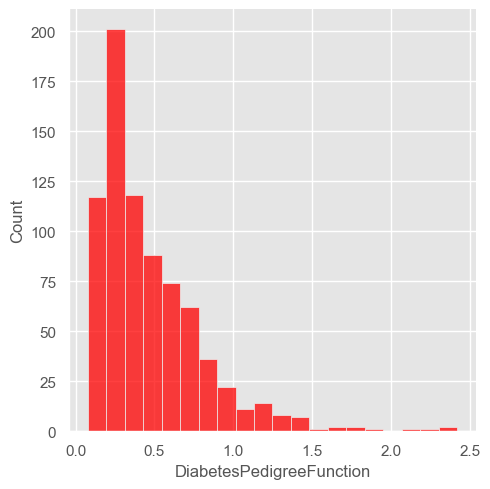

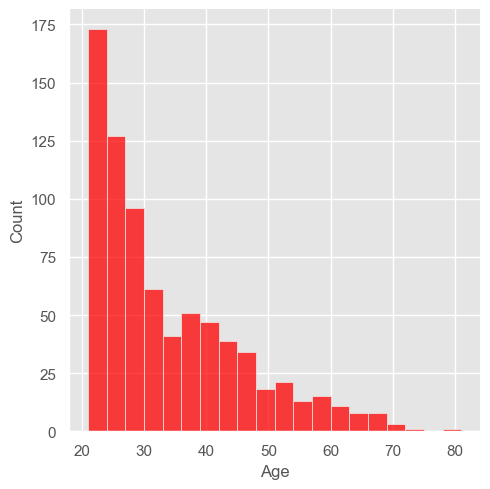

In [13]:
# Distribution of all dataset -> check the data is normal distribution are not
fig,ax =plt.subplots(4,2, figsize=(20,20))
sns.displot(df.Pregnancies, bins=20, ax=ax[0,0], color='red')
sns.displot(df.Glucose, bins=20, ax=ax[0,1], color='red')
sns.displot(df.BloodPressure, bins=20, ax=ax[1,0], color='red')
sns.displot(df.SkinThickness, bins=20, ax=ax[1,1], color='red')
sns.displot(df.Insulin, bins=20, ax=ax[2,0], color='red')
sns.displot(df.BMI, bins=20, ax=ax[2,1], color='red')
sns.displot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color='red')
sns.displot(df.Age, bins=20, ax=ax[3,1], color='red')



In [14]:
df.groupby('Outcome').agg({'Pregnancies':'mean'})

Pregnancies
Outcome             
0           3.298000
1           4.865672

In [15]:
df.groupby('Outcome').agg({'Pregnancies':'max'})

Pregnancies
Outcome             
0                 13
1                 17

In [16]:
df.groupby('Outcome').agg({'Glucose':'mean'})

Glucose
Outcome            
0        109.980000
1        141.257463

In [17]:
df.groupby('Outcome').agg({'Glucose':'max'})

Glucose
Outcome         
0            197
1            199

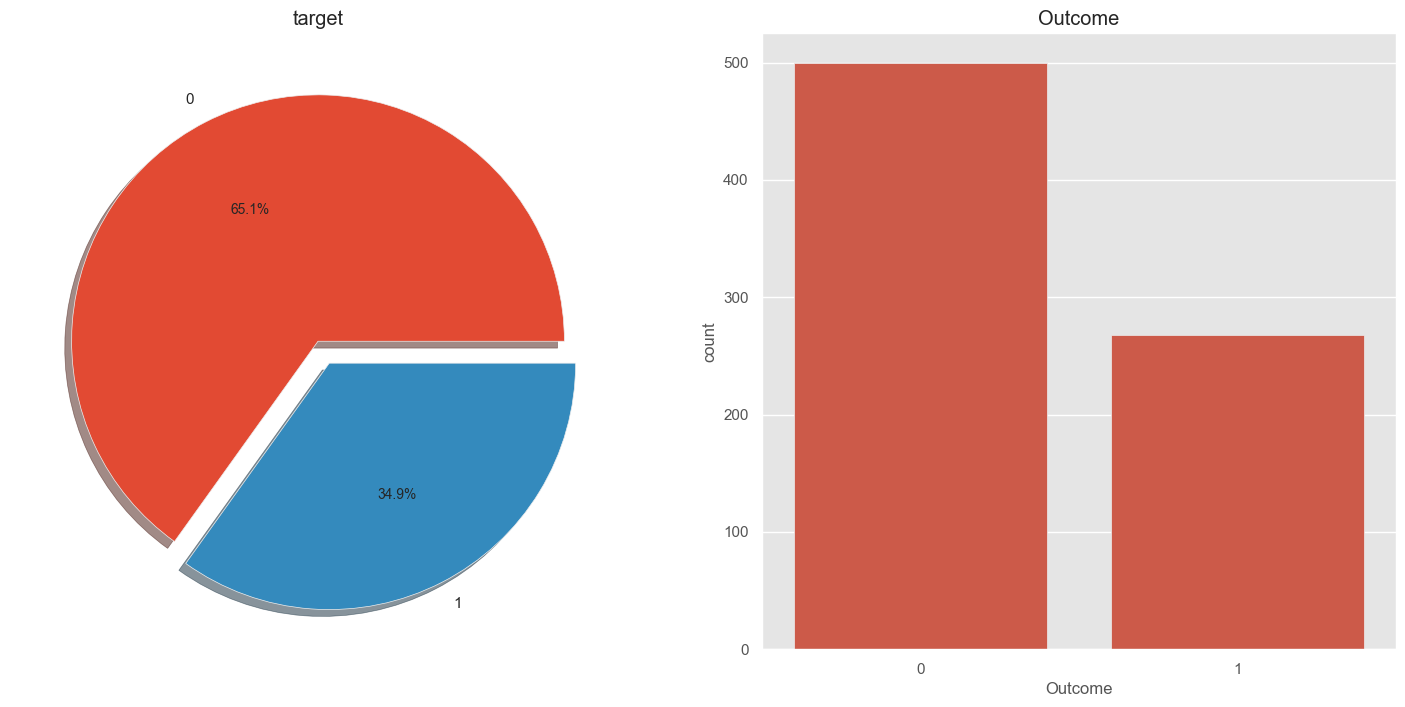

In [18]:
# 0 -> mean healthy
# 1 -> mean diabetes
f,ax=plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x="Outcome", data=df, ax=ax[1])
ax[1].set_title("Outcome")
plt.show()

In [19]:
df.corr()


Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

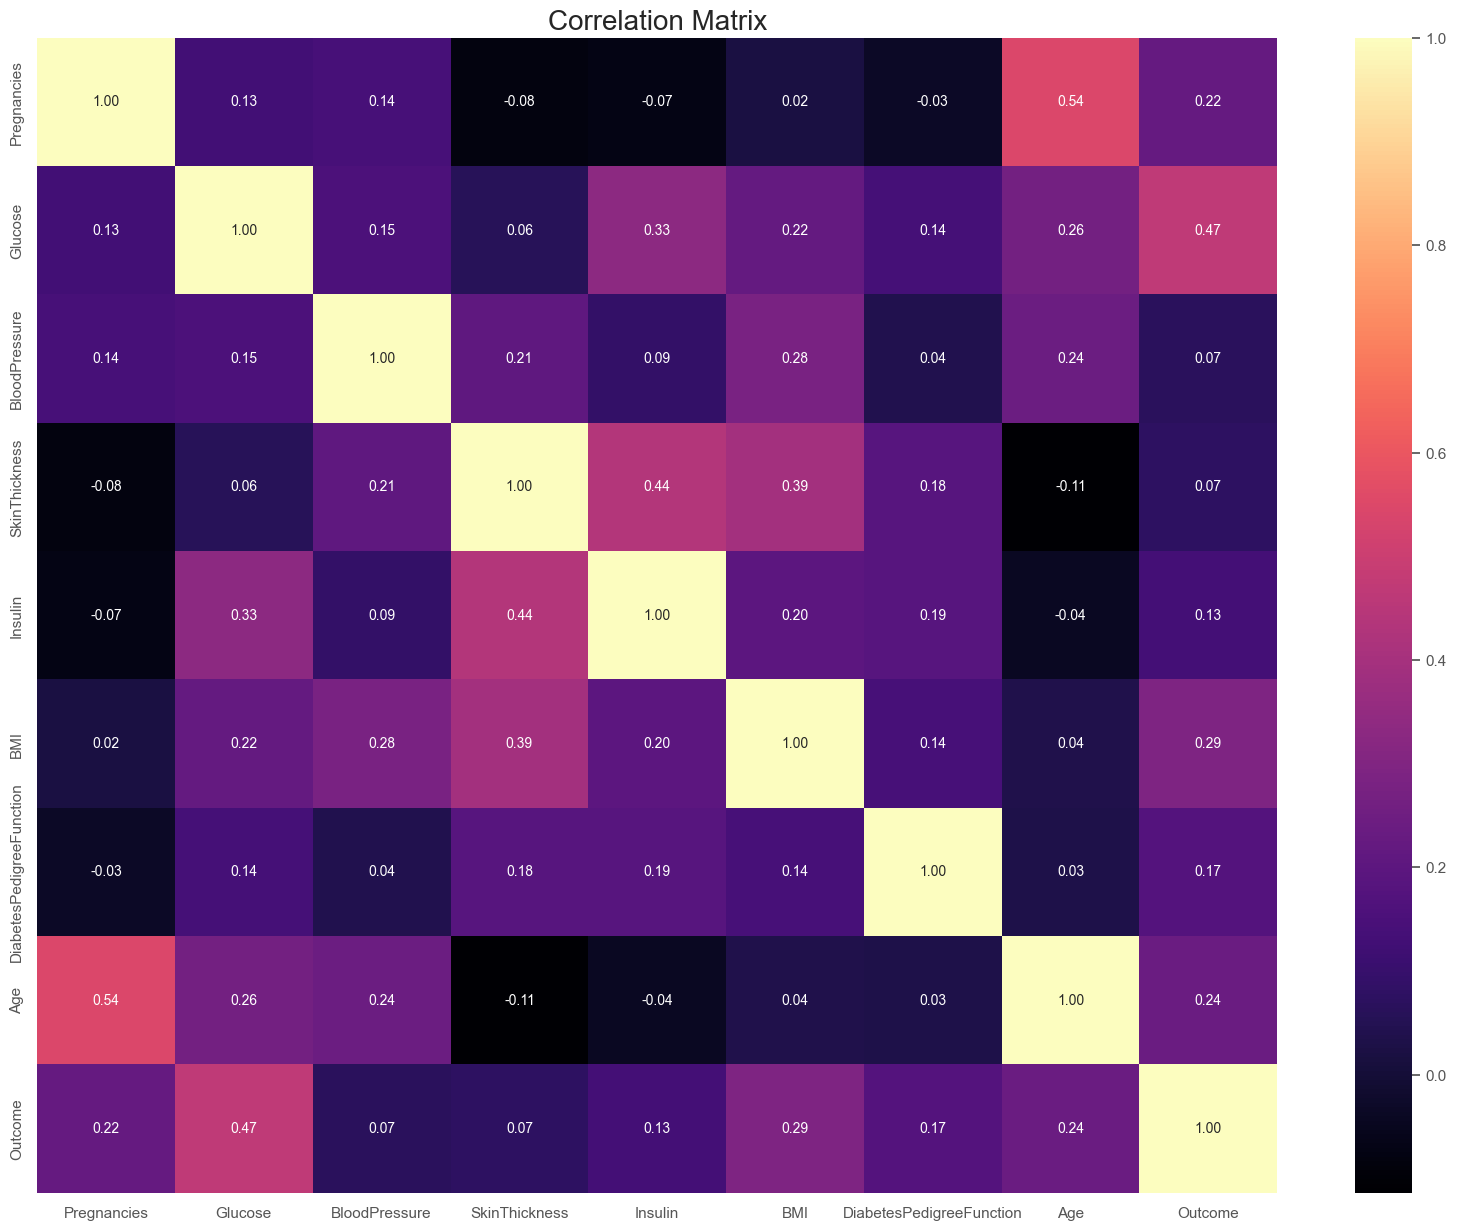

In [20]:
# plotting correlation metrix so we use heatmap okey 
f,ax= plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(),annot=True, fmt= '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [21]:
# EDA PART IS DONE 

# DATA PRE PROCESSING 

In [22]:
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [23]:
#checking is -> NAN value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', ]] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.nan)

In [26]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

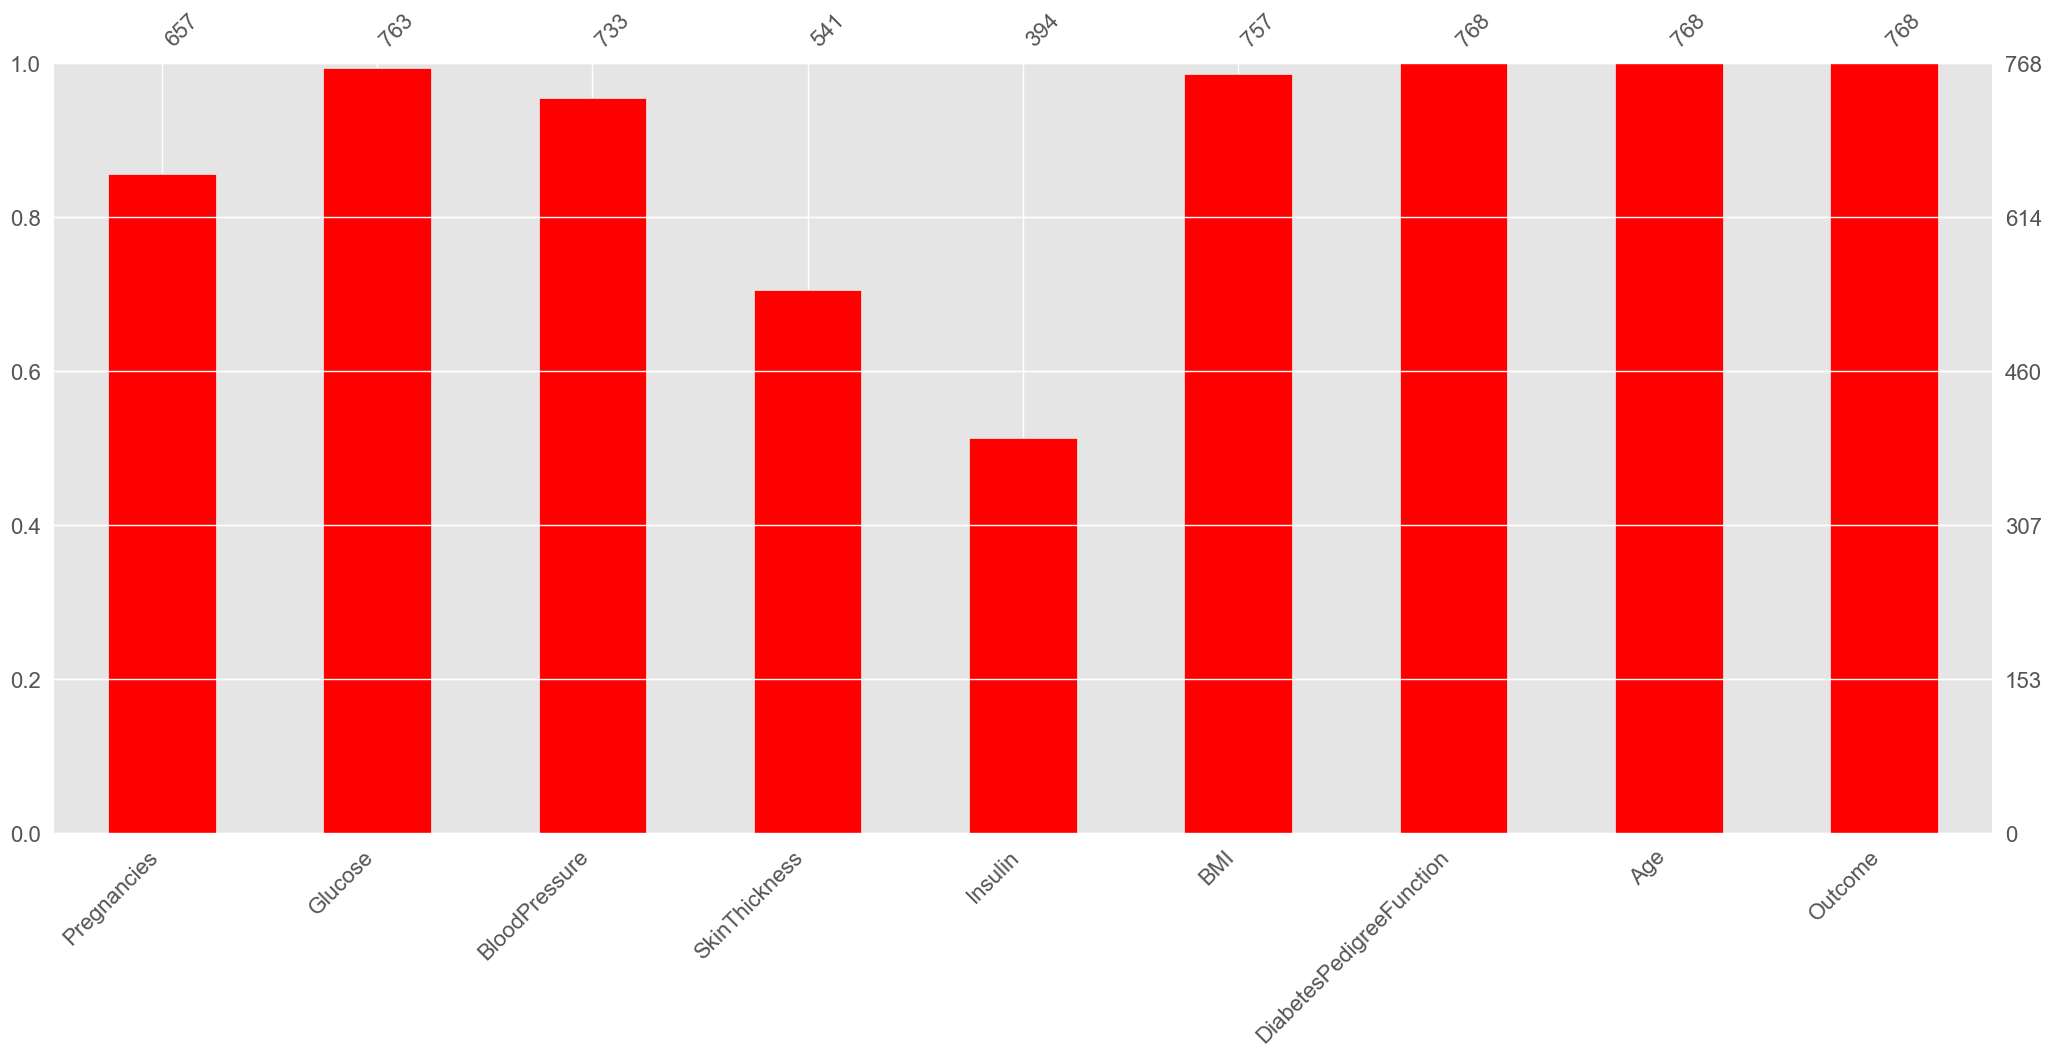

In [28]:
import missingno as msno
import matplotlib.pyplot as plt  # make sure to import matplotlib for display

msno.bar(df, color='red')
plt.show()


In [29]:
# fill all the nan value by mediam value 
def median_target(var):
    temp = df[df[var].notnull()]
    temp=temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
    

In [30]:
# drop Outcome from filling
cols = df.columns.drop('Outcome')

for col in cols:
    # compute medians per Outcome group
    medians = df.groupby('Outcome')[col].median()
    m0 = medians.get(0, np.nan)   # median for Outcome = 0
    m1 = medians.get(1, np.nan)   # median for Outcome = 1

    # fill NaN values separately for each group
    df.loc[(df['Outcome'] == 0) & (df[col].isnull()), col] = m0
    df.loc[(df['Outcome'] == 1) & (df[col].isnull()), col] = m1

In [31]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [32]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

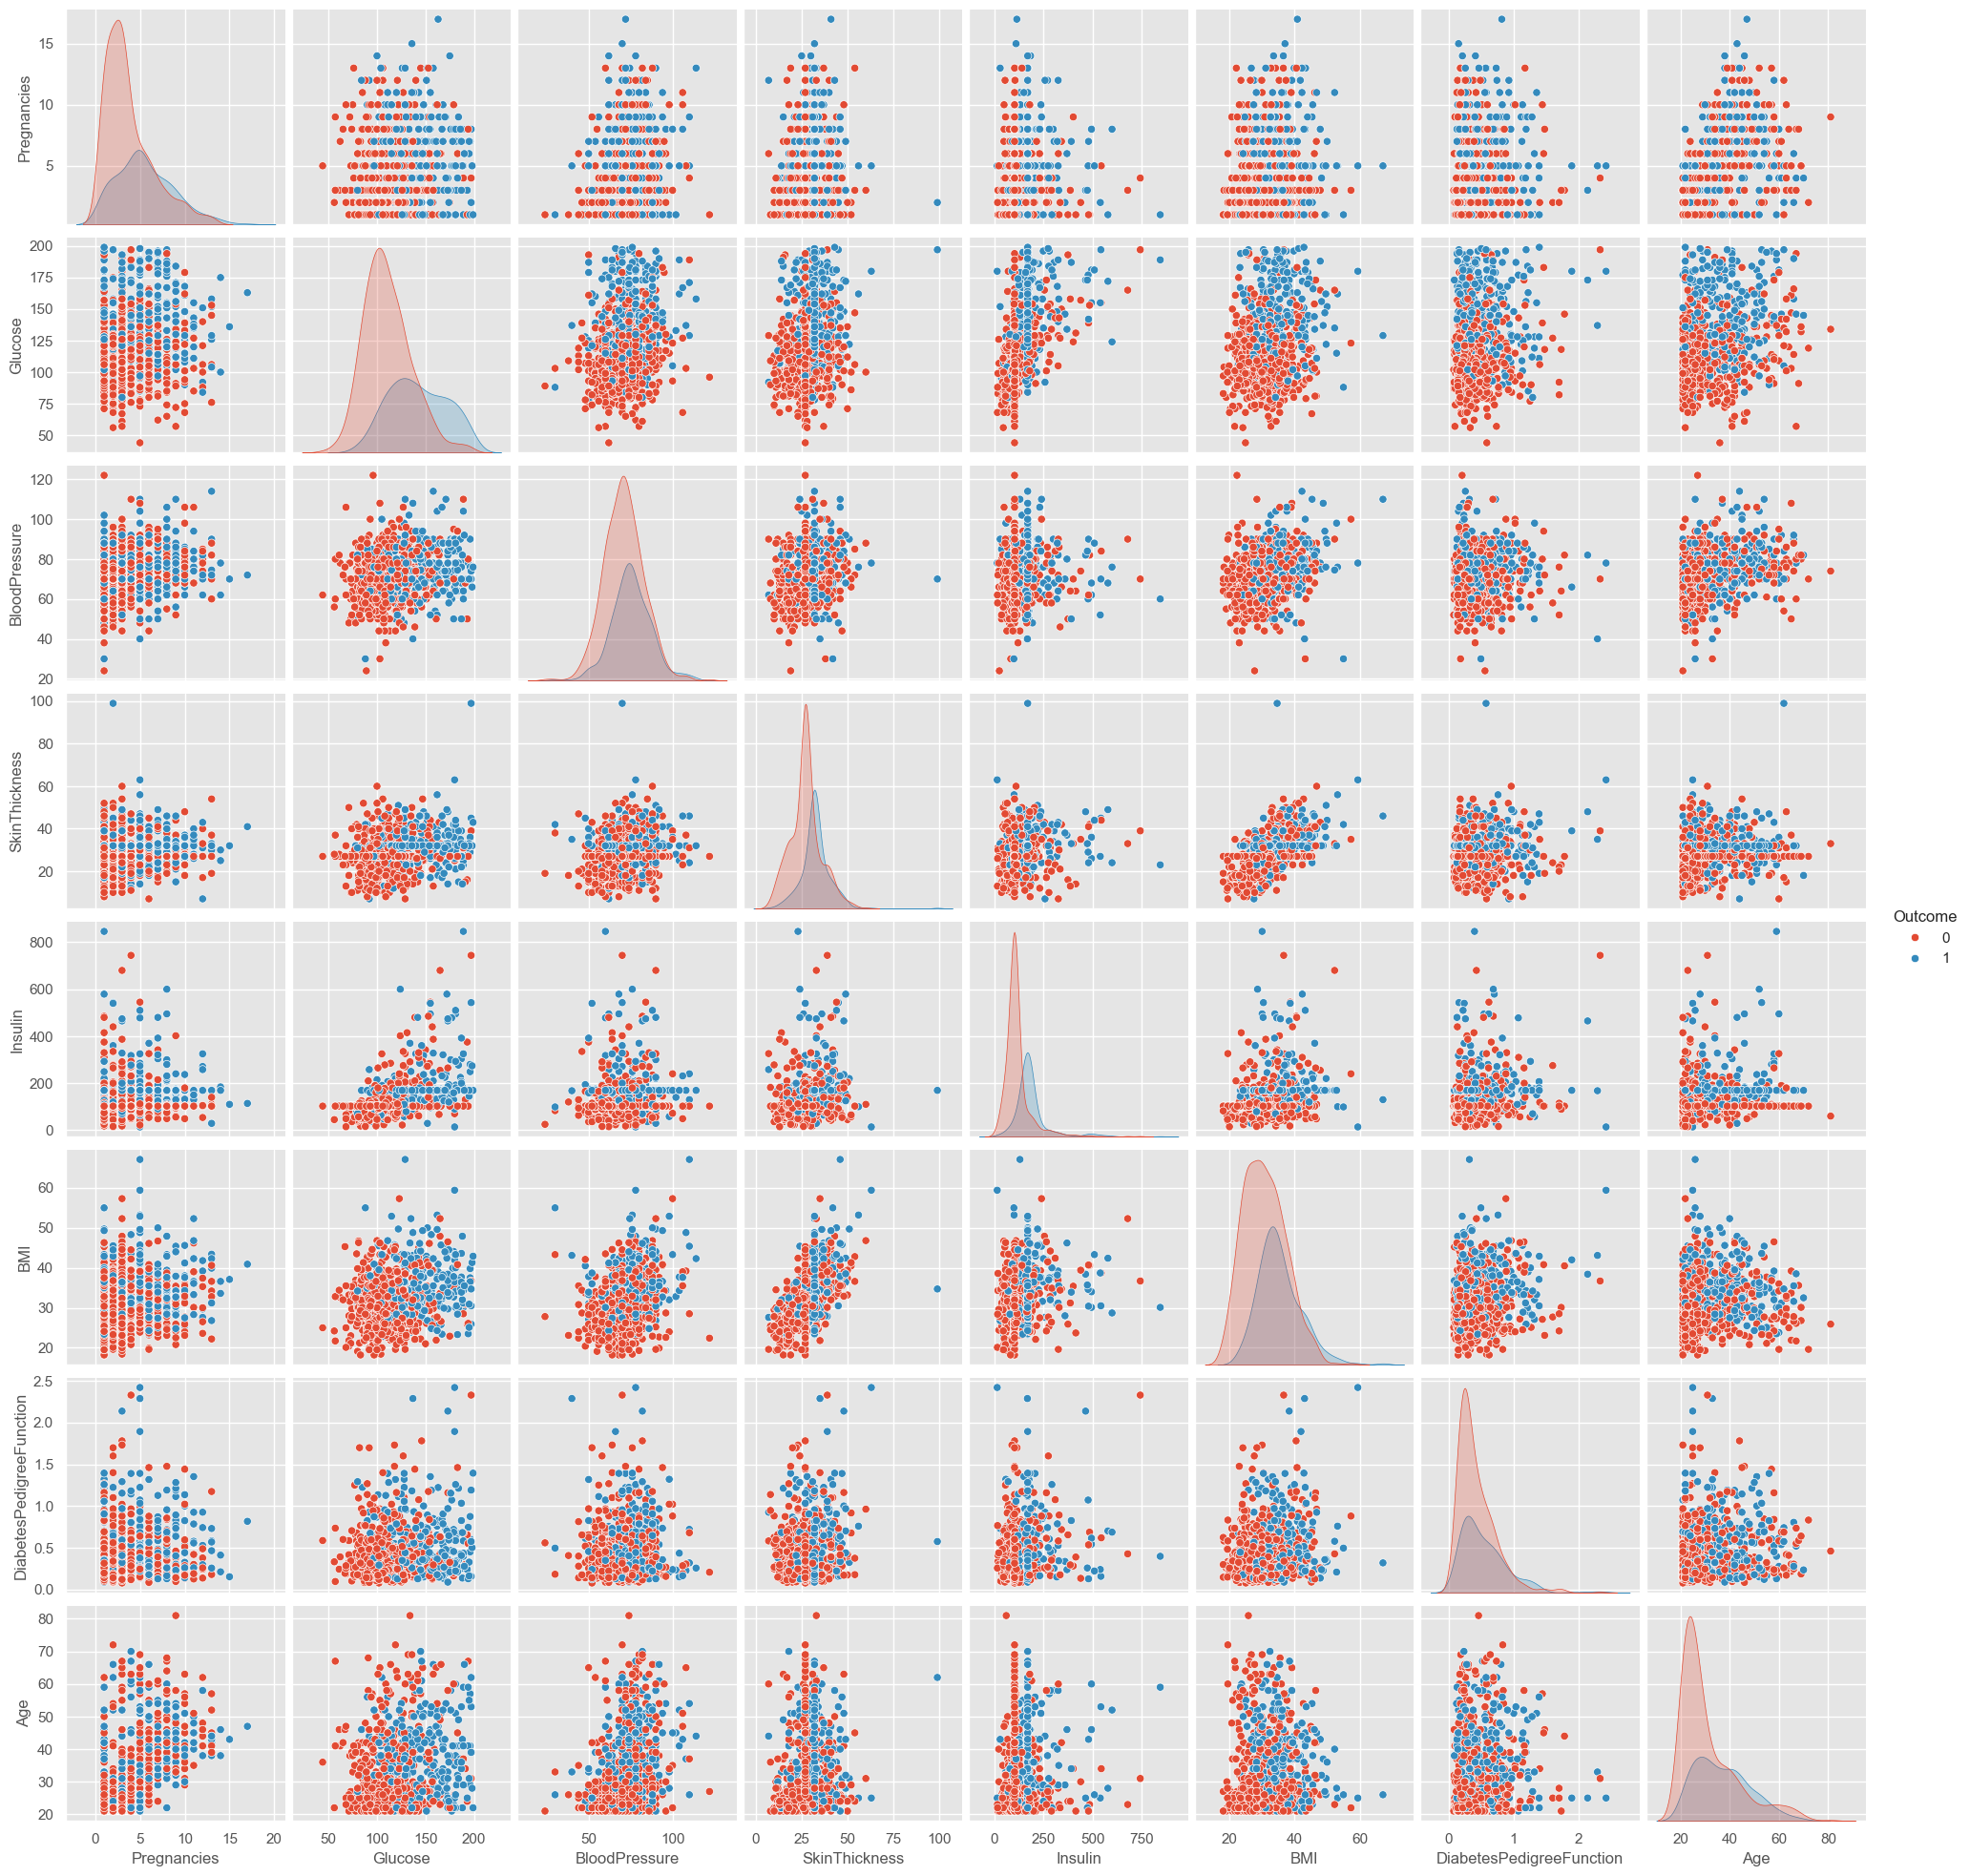

In [33]:
# piar plot
p= sns.pairplot(df,hue='Outcome')

In [34]:
# Outlier Detection => IQR
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis = None):
        print(feature,'YES')
    else:
        print(feature,'NO')


Pregnancies YES
Glucose NO
BloodPressure YES
SkinThickness YES
Insulin YES
BMI YES
DiabetesPedigreeFunction YES
Age YES
Outcome NO


<Axes: xlabel='Insulin'>

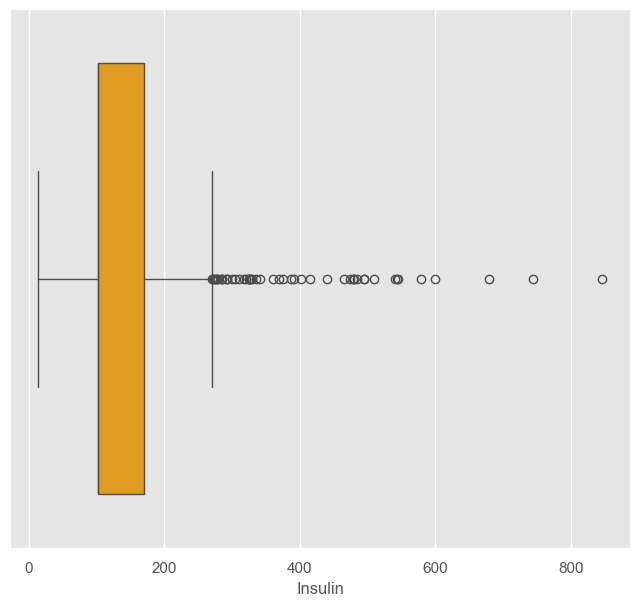

In [35]:
# checking insulin
plt.figure(figsize=(8,7))
sns.boxplot(x= df['Insulin'],color ='orange')

In [36]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df.loc[df['Insulin'] > upper, 'Insulin'] = upper


<Axes: xlabel='Insulin'>

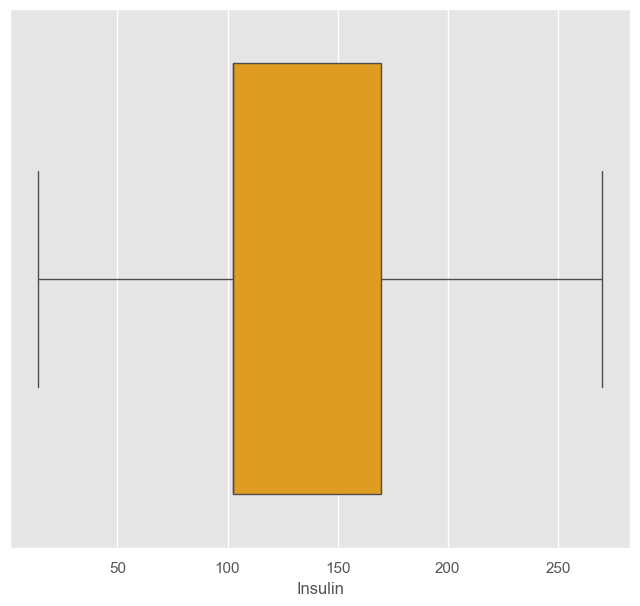

In [37]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df['Insulin'],color ='orange')

In [38]:
from sklearn.neighbors import LocalOutlierFactor

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=10)
y_pred = lof.fit_predict(df)   # -1 = outlier, 1 = inlier

# Get outlier scores
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [39]:
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<Axes: xlabel='Pregnancies'>

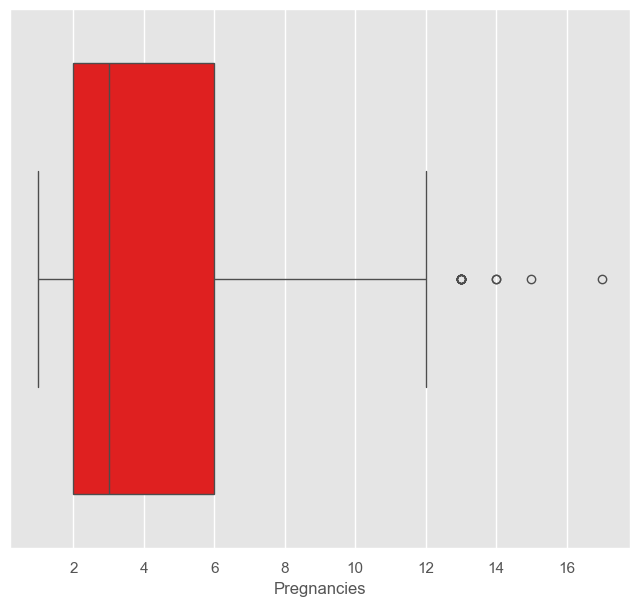

In [40]:
# check for glucose
plt.figure(figsize=(8,7))
sns.boxplot(x= df['Pregnancies'],color ='red')

In [41]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [42]:
thresold = np.sort(df_scores)[7]

In [43]:
thresold 


np.float64(-1.7497423670960557)

In [44]:
outlier = df_scores>thresold

In [45]:
df = df[outlier]

In [46]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.5  33.6   
1            1.0     85.0           66.0           29.0    102.5  26.6   
2            8.0    183.0           64.0           32.0    169.5  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            5.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    102.5  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           32.0    169.5  30.1   
767          1.0     93.0           70.0           31.0    102.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[760 rows x 9 columns]

In [47]:
df.shape

(760, 9)

# Feature Engneering

In [48]:
NewBMI = pd.Series(
    ["Underweight", "Normal", "Overweight", "Obesity1", "Obesity2", "Obesity3"],
    dtype="category")

In [49]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3       Obesity1
4       Obesity2
5       Obesity3
dtype: category
Categories (6, object): ['Normal', 'Obesity1', 'Obesity2', 'Obesity3', 'Overweight', 'Underweight']

In [50]:
df['NewBMI'] = NewBMI[0]  # initialize with some default

df.loc[df['BMI'] < 18.5, 'NewBMI'] = NewBMI[0]
df.loc[(df['BMI'] > 18.5) & (df['BMI'] <= 24.9), 'NewBMI'] = NewBMI[1]
df.loc[(df['BMI'] > 24.9) & (df['BMI'] <= 29.9), 'NewBMI'] = NewBMI[2]
df.loc[(df['BMI'] > 29.9) & (df['BMI'] <= 34.9), 'NewBMI'] = NewBMI[3]
df.loc[(df['BMI'] > 34.9) & (df['BMI'] <= 39.9), 'NewBMI'] = NewBMI[4]
df.loc[df['BMI'] > 39.9, 'NewBMI'] = NewBMI[5]


In [51]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI  
0                     0.627   50        1    Obesity1  
1                     0.351   31        0  Overweight  
2                     0.672   32        1      Normal  
3                     0.167   21        0  Overweight  
4                     2.288   33        1    Obesity3

In [52]:
# if insulin>=16 & insuin<=166->normal
def set_insuline(row):
    if row['Insulin']>=16 and row['Insulin']<=166:
        return "Normal"
    else:
        return "Abnormal"

In [53]:
df=df.assign(NewInsulinScore= df.apply(set_insuline,axis =1))

In [54]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI NewInsulinScore  
0                     0.627   50        1    Obesity1        Abnormal  
1                     0.351   31        0  Overweight          Normal  
2                     0.672   32        1      Normal        Abnormal  
3                     0.167   21        0  Overweight          Normal  
4                     2.288   33        1    Obesity3        Abnormal

In [55]:
import pandas as pd

# Define categorical values
NewGlucose = pd.Series(["Low","Normal","Overweight","Secret","High"], dtype="category")

# Assign a new column
df["NewGlucose"] = NewGlucose

# Apply conditions
df.loc[df['Glucose'] <= 70, 'NewGlucose'] = NewGlucose[0]
df.loc[(df['Glucose'] > 70) & (df['Glucose'] <= 99), 'NewGlucose'] = NewGlucose[1]
df.loc[(df['Glucose'] > 99) & (df['Glucose'] <= 126), 'NewGlucose'] = NewGlucose[2]
df.loc[df['Glucose'] > 126, 'NewGlucose'] = NewGlucose[3]


In [56]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome      NewBMI NewInsulinScore  \
0                     0.627   50        1    Obesity1        Abnormal   
1                     0.351   31        0  Overweight          Normal   
2                     0.672   32        1      Normal        Abnormal   
3                     0.167   21        0  Overweight          Normal   
4                     2.288   33        1    Obesity3        Abnormal   

  NewGlucose  
0     Secret  
1     Normal  
2     Secret  
3     Normal  
4     Secret

In [57]:
# one hot encoding -> handling a categorical features
df = pd.get_dummies(df,columns = ["NewBMI","NewInsulinScore","NewGlucose"], drop_first = True)


In [58]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity1  NewBMI_Obesity2  \
0                     0.627   50        1             True            False   
1                     0.351   31        0            False            False   
2                     0.672   32        1            False            False   
3                     0.167   21        0            False            False   
4                     2.288   33        1            False            False   

   NewBMI_Obesity3  NewBMI_Overweight  NewBMI_Underweight  \
0            False              False               False   
1            False               True               False   
2            False              False               False   
3            False               True               False   
4             True              False               False   

   NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                   False           False              False   
1                    True           False               True   
2                   False           False              False   
3                    True           False               True   
4                   False           False              False   

   NewGlucose_Overweight  NewGlucose_Secret  
0                  False               True  
1                  False              False  
2                  False               True  
3                  False              False  
4                  False               True

In [59]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity1',
       'NewBMI_Obesity2', 'NewBMI_Obesity3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [60]:
categorical_df= df[['NewBMI_Obesity1',
       'NewBMI_Obesity2', 'NewBMI_Obesity3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]
# Convert all boolean columns to integers (1 for True, 0 for False)
categorical_df = categorical_df.astype(int)

In [61]:
categorical_df.head()

NewBMI_Obesity1  NewBMI_Obesity2  NewBMI_Obesity3  NewBMI_Overweight  \
0                1                0                0                  0   
1                0                0                0                  1   
2                0                0                0                  0   
3                0                0                0                  1   
4                0                0                1                  0   

   NewBMI_Underweight  NewInsulinScore_Normal  NewGlucose_Low  \
0                   0                       0               0   
1                   0                       1               0   
2                   0                       0               0   
3                   0                       1               0   
4                   0                       0               0   

   NewGlucose_Normal  NewGlucose_Overweight  NewGlucose_Secret  
0                  0                      0                  1  
1                  1                      0                  0  
2                  0                      0                  1  
3                  1                      0                  0  
4                  0                      0                  1

In [62]:
y=df['Outcome']
x=df.drop(['Outcome','NewBMI_Obesity1',
       'NewBMI_Obesity2', 'NewBMI_Obesity3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],axis=1)

In [63]:
col=x.columns
index = x.index

In [64]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [65]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x)
x =transformer.transform(x)
x=pd.DataFrame(x,columns = cols,index = index)

In [66]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         0.75    0.775          0.000       1.000000  1.000000  0.177778   
1        -0.50   -0.800         -0.375       0.142857  0.000000 -0.600000   
2         1.25    1.650         -0.500       0.571429  1.000000 -0.966667   
3        -0.50   -0.700         -0.375      -0.714286 -0.126866 -0.433333   
4         0.50    0.500         -2.000       1.000000  0.977612  1.233333   

   DiabetesPedigreeFunction       Age  
0                  0.669707  1.235294  
1                 -0.049511  0.117647  
2                  0.786971  0.176471  
3                 -0.528990 -0.470588  
4                  4.998046  0.235294

In [67]:
pd.concat([x,categorical_df],axis=1)

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0           0.75    0.775          0.000       1.000000  1.000000  0.177778   
1          -0.50   -0.800         -0.375       0.142857  0.000000 -0.600000   
2           1.25    1.650         -0.500       0.571429  1.000000 -0.966667   
3          -0.50   -0.700         -0.375      -0.714286 -0.126866 -0.433333   
4           0.50    0.500         -2.000       1.000000  0.977612  1.233333   
..           ...      ...            ...            ...       ...       ...   
763         1.75   -0.400          0.250       2.857143  1.156716  0.100000   
764        -0.25    0.125         -0.125      -0.142857  0.000000  0.533333   
765         0.50    0.100          0.000      -0.714286  0.141791 -0.644444   
766        -0.50    0.225         -0.750       0.571429  1.000000 -0.211111   
767        -0.50   -0.600         -0.125       0.428571  0.000000 -0.177778   

     DiabetesPedigreeFunction       Age  NewBMI_Obesity1  NewBMI_Obesity2  \
0                    0.669707  1.235294                1                0   
1                   -0.049511  0.117647                0                0   
2                    0.786971  0.176471                0                0   
3                   -0.528990 -0.470588                0                0   
4                    4.998046  0.235294                0                0   
..                        ...       ...              ...              ...   
763                 -0.518567  2.000000                1                0   
764                 -0.078176 -0.117647                0                1   
765                 -0.325733  0.058824                0                0   
766                 -0.054723  1.058824                1                0   
767                 -0.143322 -0.352941                1                0   

     NewBMI_Obesity3  NewBMI_Overweight  NewBMI_Underweight  \
0                  0                  0                   0   
1                  0                  1                   0   
2                  0                  0                   0   
3                  0                  1                   0   
4                  1                  0                   0   
..               ...                ...                 ...   
763                0                  0                   0   
764                0                  0                   0   
765                0                  1                   0   
766                0                  0                   0   
767                0                  0                   0   

     NewInsulinScore_Normal  NewGlucose_Low  NewGlucose_Normal  \
0                         0               0                  0   
1                         1               0                  1   
2                         0               0                  0   
3                         1               0                  1   
4                         0               0                  0   
..                      ...             ...                ...   
763                       0               0                  0   
764                       1               0                  0   
765                       1               0                  0   
766                       0               0                  0   
767                       1               0                  1   

     NewGlucose_Overweight  NewGlucose_Secret  
0                        0                  1  
1                        0                  0  
2                        0                  1  
3                        0                  0  
4                        0                  1  
..                     ...                ...  
763                      1                  0  
764                      1                  0  
765                      1                  0  
766                      1                  0  
767                      0                  0  

[760

# Train_Test_Split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [69]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Apply Machine Learning Algorithm


In [70]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_pred = log_reg.predict(x_test)

In [72]:
accuracy_score(y_train,log_reg.predict(x_train))

0.8042763157894737

In [73]:
# checking in test
log_reg_acc =accuracy_score(y_test,log_reg.predict(x_test))

In [74]:
confusion_matrix(y_test,y_pred)

array([[86, 12],
       [16, 38]])

In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86        98
           1       0.76      0.70      0.73        54

    accuracy                           0.82       152
   macro avg       0.80      0.79      0.80       152
weighted avg       0.81      0.82      0.81       152



In [76]:
# APPLY KNN
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
y_pred = knn.predict(x_test)
print(accuracy_score(y_train,knn.predict(x_train)))
knn_acc=accuracy_score(y_test,knn.predict(x_test))
print(accuracy_score(y_test,knn.predict(x_test)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.8914473684210527
0.8881578947368421
[[87 11]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        98
           1       0.81      0.89      0.85        54

    accuracy                           0.89       152
   macro avg       0.87      0.89      0.88       152
weighted avg       0.89      0.89      0.89       152



In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# instantiate estimator
svc = SVC(probability=True)

parameter = {
    "gamma": [0.0001, 0.001, 0.01, 0.1],
    "C":     [0.01, 0.05, 0.5, 1, 10, 15, 20]   # removed duplicate 0.01
}

grid_search = GridSearchCV(estimator=svc, param_grid=parameter, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("best params:", grid_search.best_params_)
print("best score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)


best params: {'C': 1, 'gamma': 0.1}
best score: 0.8553177076276928


In [79]:
svc = SVC(C=10,gamma =0.01,probability = True)
svc.fit(x_train,y_train)
print(accuracy_score(y_train,svc.predict(x_train)))
svc_acc=accuracy_score(y_test,svc.predict(x_test))
print(accuracy_score(y_test,svc.predict(x_test)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.8634868421052632
0.868421052631579
[[90  8]
 [13 41]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        98
           1       0.84      0.76      0.80        54

    accuracy                           0.86       152
   macro avg       0.86      0.84      0.85       152
weighted avg       0.86      0.86      0.86       152



In [80]:
# DECISION Tree
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
print(accuracy_score(y_train,DT.predict(x_train)))
dt_acc = accuracy_score(y_test,DT.predict(x_test))
print(accuracy_score(y_test,DT.predict(x_test)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8552631578947368
[[90  8]
 [13 41]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        98
           1       0.84      0.76      0.80        54

    accuracy                           0.86       152
   macro avg       0.86      0.84      0.85       152
weighted avg       0.86      0.86      0.86       152



In [81]:
# Hyperparameter tuninig of DT
grid_param = {
    'criterion': ['gini', 'entropy'],           # Splitting criterion
    'max_depth': [3, 5, 7, 10],                 # Maximum tree depth
    'splitter': ['best', 'random'],             # Split strategy (corrected 'radom' to 'random')
    'min_samples_leaf': [1, 2, 3, 5, 7],        # Minimum samples required at leaf node
    'min_samples_split': [1, 2, 3, 5, 7],       # Minimum samples required to split node
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider for split
    
}
grid_search_dt = GridSearchCV(DT,grid_param,cv =50, n_jobs= -1, verbose = 1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy')

In [82]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'], 
    'learning_rate': [0.001, 0.1, 1, 10], 
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv=10, n_jobs=-1, verbose=1)
grid_search_gbc.fit(x_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [83]:
gbc = GradientBoostingClassifier(learning_rate = 0.1,loss = 'exponential',n_estimators = 150)
gbc.fit(x_train,y_train)


GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [84]:
#gbc = grid_search_gbc.best_estimattor_
y_pred = gbc.predict(x_test)
print(accuracy_score(y_train,gbc.predict(x_train)))
gbc_acc = accuracy_score(y_test,gbc.predict(x_test))
print(accuracy_score(y_test,gbc.predict(x_test)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.9983552631578947
0.9078947368421053
[[90  8]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.86      0.89      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



In [85]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic',learning_rate =0.01, max_depth = 10,n_estimators = 180)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [86]:
y_pred = xgb.predict(x_test)
print(accuracy_score(y_train,xgb.predict(x_train)))
xgb_acc = accuracy_score(y_test,xgb.predict(x_test))
print(accuracy_score(y_test,xgb.predict(x_test)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.975328947368421
0.875
[[88 10]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        98
           1       0.82      0.83      0.83        54

    accuracy                           0.88       152
   macro avg       0.86      0.87      0.86       152
weighted avg       0.88      0.88      0.88       152



In [87]:
# MODEL COMPARISION 
models = pd.DataFrame({
    'Model': ['LogisticRegression', 'kNN', 'SVM', 'Decision Tree Classifier', 'Gradient Boosting Classifier', 'XGBOOST'],
    'Score': [100 * round(log_reg_acc, 4), 100 * round(knn_acc, 4), 100 * round(svc_acc, 4), 100 * round(dt_acc, 4), 100 * round(gbc_acc, 4), 100 * round(xgb_acc, 4)]
})
models.sort_values(by='Score', ascending=False)

Model  Score
4  Gradient Boosting Classifier  90.79
1                           kNN  88.82
5                       XGBOOST  87.50
2                           SVM  86.84
3      Decision Tree Classifier  85.53
0            LogisticRegression  81.58

In [88]:
import joblib 

In [90]:
joblib.dump(gbc, "gradient_boosting_classifier_model.pkl")

['gradient_boosting_classifier_model.pkl']